In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../lib/VAD-Humbug'))
sys.path.insert(0, os.path.abspath('../lib'))
import os
# if not os.getcwd().endswith('VAD-Humbug'):
#   os.chdir('../lib/VAD-Humbug')
from VAD_pipeline import VAD_pipeline
import matplotlib.pyplot as plt

import pickle
import util
import librosa
import numpy as np
import soundfile as sf
import ipdb

from scipy.signal import medfilt

C:\Users\ikiskin\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
C:\Users\ikiskin\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


# VAD

# Load model for detection

## Deep learning (skip if keras/tensorflow not installed)

In [92]:
from tensorflow import keras
model = keras.models.load_model('../models/BNN/Win_40_Stride_5_CNN_log-mel_128_norm_Falseheld_out_test_manual_v2_low_epoch.h5',
                               custom_objects={"dropout": 0.2})

model = keras.models.load_model('F:/PostdocCode/HumBugDB/outputs/models/keras/neurips_2021_humbugdb_keras_bnn_best.hdf5',
                               custom_objects={"dropout": 0.2}) 

model_name = 'held_out_test_manual_v2_low_epoch'
model_name = 'neurips_2021_humbugdb_keras_bnn_best'
win_size=30
step_size=30
feat_type='log-mel'
n_feat=128

## Random Forest prediction

In [56]:
model_name = 'clf_CDC_mfcc-cut20'
with open('../models/' + model_name + '.pickle', 'rb') as handle:
    clf = pickle.load(handle)

2020-11-09_18.59.09.243.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/1800/2020-11-09_18.59.09.243.wav
[[424.576, 424.96, '0.60'], [425.216, 425.344, '0.57'], [940.416, 940.864, '0.99'], [1256.064, 1256.192, '0.51'], [1452.032, 1452.48, '0.96'], [1462.464, 1463.36, '0.84'], [1753.536, 1753.728, '0.59']]


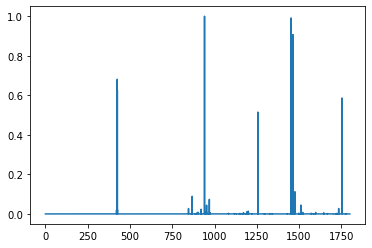

2020-11-09_19.29.14.337.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/1900/2020-11-09_19.29.14.337.wav
[]


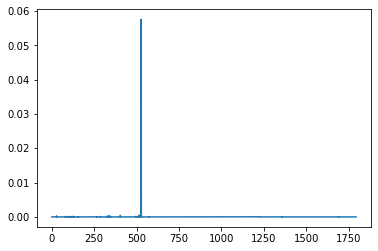

2020-11-09_19.59.14.331.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/1900/2020-11-09_19.59.14.331.wav
[]


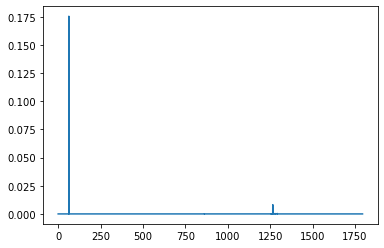

2020-11-09_20.29.14.359.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/2000/2020-11-09_20.29.14.359.wav
[]


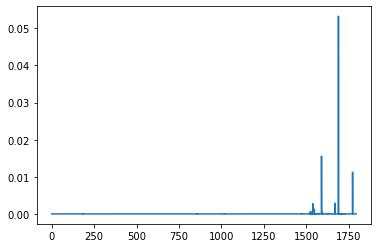

2020-11-09_20.59.14.355.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/2000/2020-11-09_20.59.14.355.wav
[[1746.368, 1746.752, '0.84']]


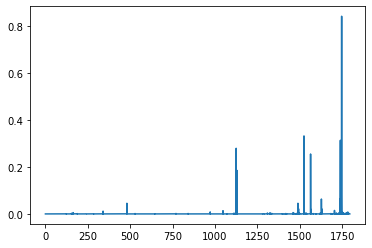

2020-11-09_21.29.14.391.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/2100/2020-11-09_21.29.14.391.wav
[]


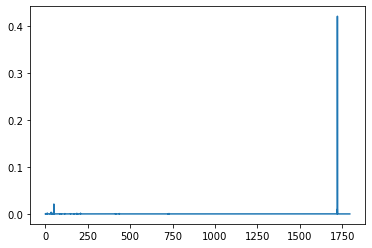

2020-11-09_21.59.14.342.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/2100/2020-11-09_21.59.14.342.wav
[]


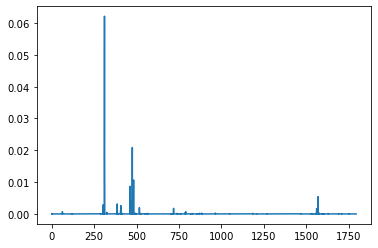

2020-11-09_22.29.14.343.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/2200/2020-11-09_22.29.14.343.wav
[[326.528, 326.976, '0.97']]


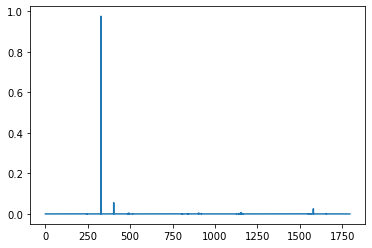

2020-11-09_22.59.14.358.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/2200/2020-11-09_22.59.14.358.wav
[[40.448, 40.832, '0.94']]


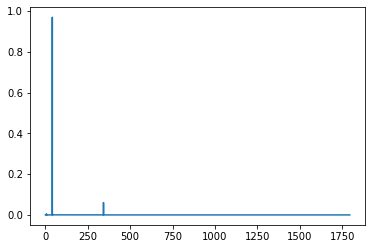

2020-11-09_23.29.14.358.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/2300/2020-11-09_23.29.14.358.wav
[]


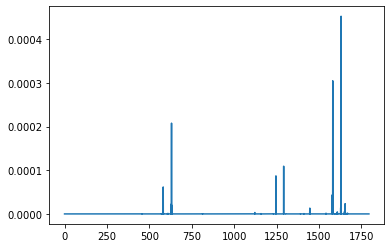

2020-11-09_23.59.14.396.wav
D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/2300/2020-11-09_23.59.14.396.wav
[]


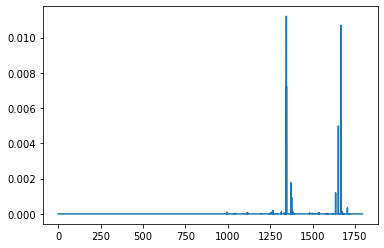

In [61]:
sr = 8000
to_filter = True
kernel_size = 11

directory = 'D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/2020-11-09/'
subdirectories = ['1800', '0019', '2000', '2100', '2200', '2300']
dir_out = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/A1/'


for subdir in subdirectories:
    listdirectory = os.listdir(directory + subdir) # gets the name of all files in your dir
    for filename in listdirectory: 
        if filename.endswith(".wav"): # check each of the files for whether or not they end in .wav:
            print(filename)
            x, x_l = util.get_wav_for_path_pipeline([directory + subdir + '/' + filename], sr =8000)
            X = util.get_feat(x, sr=8000, feat_type='mfcc-cut', flatten = True, n_feat=20)
           
            preds_prob = clf.predict_proba(X)
            
            if to_filter:
                preds_filt = np.zeros([len(preds_prob),2])
                preds_filt[:,1] = medfilt(preds_prob[:,1], kernel_size=kernel_size)
                preds_filt[:,0] = 1 - preds_prob[:,1]
                preds_prob = preds_filt
          
            preds_list = util.detect_timestamps(preds_prob)
            
            plt.plot((1/sr)*librosa.frames_to_samples(np.arange(len(preds_prob)), hop_length=512),
                                               preds_prob[:,1])
            print(preds_list)
            plt.show()

            if not os.path.exists(dir_out + subdir): os.makedirs(dir_out + subdir)
#             with open(dir_out + subdir + '/mozz_pred_list' + filename + '.pkl', 'wb') as f:
#                 pickle.dump(preds_list, f)
            np.savetxt(dir_out + subdir + '/' + str(model_name) + filename + '.txt', preds_list, fmt='%s', delimiter='\t')
                               

# BNN prediction

In [4]:
import pandas as pd
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange


In [540]:
# Good to go for files with a single .wav extension, .wav.wav, and .aac, HOWEVER requeres changing the endswith() code in the 
# third for loop


rootFolderPath = 'D:/Postdoc/MozzDetectorTestingSQL/Code/data'
rootFolderPath = 'F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)/2020-11-23_A1_100/0000'
audio_format = '.wav'
dir_out = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/graphs/A1wavtest'  # None if we want to save files in the same folder that we read from





#CNN:
to_filter = False
norm = True
step_size= 30
debug= True
n_samples = 10
n_hop = 512
sr = 8000
win_size = 30



#Experimental
mozz_audio_list = []
det_threshold = 0.5
to_dashboard=True

i_signal = 0
for root, dirs, files in os.walk(rootFolderPath):
    for filename in files:

        if filename.endswith(audio_format):
            print(root, filename) 
            i_signal+=1
    
            x, x_l = util.get_wav_for_path_pipeline([os.path.join(root, filename)], sr =8000)
            if debug:
                print(filename + ' signal length', x_l)
            if x_l < (n_hop * win_size)/sr: 
                print('Signal length too short, skipping:', x_l, filename) 
            else:
    #             
                X_CNN = util.get_feat(x, sr=8000, feat_type=feat_type, n_feat=n_feat, flatten = False, norm_per_sample=norm)

                X_CNN = util.reshape_feat(X_CNN, win_size=win_size, step_size=step_size)
    #             X_CNN = (X_CNN - mean)/std
    #             print(np.shape(X_CNN))

                out = []
                for i in range(n_samples):
                    out.append(model.predict(X_CNN))

                G_X, U_X, _ = util.active_BALD(np.log(out))
                
                y_to_timestamp = np.repeat(np.mean(out, axis=0), step_size, axis=0)
                G_X_to_timestamp = np.repeat(G_X, step_size, axis=0)
                U_X_to_timestamp = np.repeat(U_X, step_size, axis=0)
                preds_list = util.detect_timestamps_BNN(y_to_timestamp, G_X_to_timestamp, U_X_to_timestamp, 
                                                        det_threshold=det_threshold)   

                if to_filter:
                    preds_filt = np.zeros([len(preds_CNN),2])
                    preds_filt[:,1] = medfilt(preds_CNN[:,1], kernel_size=51)
                    preds_filt[:,0] = 1 - preds_filt[:,1]
                    preds_CNN = preds_filt

                if debug:
                    print(preds_list)
                    for times in preds_list:
                        mozz_audio_list.append(librosa.load(os.path.join(root, filename), offset=float(times[0]),
                                                             duration=float(times[1])-float(times[0]), sr=sr)[0])
                        
                    x = (1/sr)*librosa.frames_to_samples(np.arange(len(np.repeat(np.mean(out, axis=0),step_size, axis=0))),
                                                         hop_length=512)
                    t = pd.to_datetime(x, unit='s') # convert to datetime
                    y = np.repeat(np.mean(out, axis=0), step_size, axis=0)[:,1]
                
                if not dir_out:
                    dir_out = root
                

                    

                if not os.path.exists(dir_out): os.makedirs(dir_out)
                
                # Condition to take care of aac files uploaded without a second extension, but also wav with.  
                if filename.endswith(audio_format):  
                    output_filename = filename[:-4]  # remove file extension for renaming to other formats.
                else:
                    output_filename = filename # no file extension present

                    
                text_output_filename = dir_out + '/' + output_filename + '_BNN_step_' + str(step_size) + '_samples_' + str(n_samples) + '_'+ str(model_name) + '.txt'
                np.savetxt(text_output_filename, preds_list, fmt='%s', delimiter='\t')
                
                if to_dashboard: 
                    mozz_audio_filename, audio_length, has_mosquito = write_audio_for_plot(text_output_filename, root, filename, output_filename, dir_out, sr)
                    if has_mosquito:
                        plot_filename = plot_mozz_MI(X_CNN, y_to_timestamp[:,1], U_X_to_timestamp, 0.5, dir_out, output_filename)
                        write_video_for_dash(plot_filename, mozz_audio_filename, audio_length, dir_out, output_filename)

                # Command line code with FFMPEG to now create video here: will need vars:
                # filename of image
                # duration in seconds of saved audio
                

print('Total files of ' + str(audio_format) + ' format processed:', i_signal)


F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)/2020-11-23_A1_100/0000 2020-11-23_00.01.40.724.wav
2020-11-23_00.01.40.724.wav signal length 1794.72
[['1432.32', '1434.24', '0.5402 PE: 0.9953 MI: 0.5615']]
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)/2020-11-23_A1_100/0000 2020-11-23_00.31.40.761.wav
2020-11-23_00.31.40.761.wav signal length 1794.6
[['264.96', '268.8', '0.7505 PE: 0.8031 MI: 0.4457'], ['311.04', '312.96', '0.6704 PE: 0.9146 MI: 0.3086'], ['314.88', '316.8', '0.6044 PE: 0.9683 MI: 0.1368'], ['451.2', '453.12', '0.5586 PE: 0.9901 MI: 0.2499']]
Total files of .wav format processed: 2


In [434]:
output_filename

'R4_cleaned recording_17-10-17'

In [428]:
filename

'R4_cleaned recording_17-10-17.wav'

In [445]:
with open(text_output_filename) as f:
    reader = csv.reader(f, delimiter='\t')
    for line in reader:
        p = float(line[2].split()[0])
        PE = float(line[2].split()[2])
        MI = float(line[2].split()[4])

In [338]:
plot_mozz_MI(X_CNN, y_to_timestamp[:,1], U_X_to_timestamp, 0.5, dir_out, filename)

In [502]:
filename

'2020-11-23_00.31.40.761.wav_BNN_step_40_samples_10_held_out_test_manual_v2_low_epochsecond_run.txt'

In [537]:
# t=pd.to_datetime(x, unit='s')
# T = t.to_pydatetime()
# x = (1/sr)*librosa.frames_to_samples(np.arange(len(np.repeat(np.mean(out, axis=0),step_size, axis=0))),
#                                      hop_length=512)
# t = pd.to_datetime(x, unit='s') # convert to datetime
# y = np.repeat(np.mean(out, axis=0), step_size, axis=0)[:,1]
# MI = np.repeat(U_X, step_size, axis=0)



def plot_mozz_MI(X_CNN, y, MI, p_threshold, root_out, filename, out_format='.png'):
    '''Produce plot of all mosquito detected above a p_threshold. Supply Mutual Information values MI, feature inputs 
    X_CNN, and predictions y (1D array of 0/1s). Plot to be displayed on dashboard either via svg or as part of a
    video (looped png) with audio generated for this visual presentation.
    
    `out_format`: .png, or .svg
    
    '''
    pos_pred_idx = np.where(y>p_threshold)[0]

    fig, axs = plt.subplots(2, sharex=True, figsize=(10*(1000/720),5*(500/360)), gridspec_kw={
           'width_ratios': [1],
           'height_ratios': [2,1]})
    fig.patch.set_facecolor('#485563')
    # x_lims = mdates.date2num(T)
    # date_format = mdates.DateFormatter('%M:%S')
    # axs[0].xaxis_date()
    # axs[0].xaxis.set_major_formatter(date_format)
    
    axs[0].set_ylabel('Frequency (kHz)')
    
    axs[0].imshow(np.hstack(X_CNN).squeeze().T[:,pos_pred_idx], aspect='auto', origin='lower',
                  extent = [0, len(pos_pred_idx), 0, 4], interpolation=None)
    axs[1].plot(y[pos_pred_idx], label='Probability of mosquito')
    axs[1].plot(MI[pos_pred_idx], '--', label='Uncertainty of prediction')
    axs[1].set_ylim([0., 1.02])
    axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              frameon=False, ncol=2)
    # axs[1].xaxis.set_major_formatter(date_format)
    
    axs[1].yaxis.set_label_position("right")
    axs[1].yaxis.tick_right()
    axs[0].yaxis.set_label_position("right")
    axs[0].yaxis.tick_right()
    # axs[1].set_xlim([t[0], t[-1]])
    axs[1].grid(which='major')
    # axs[1].set_xlabel('Time (mm:ss)')
    axs[1].xaxis.get_ticklocs(minor=True)
    axs[1].yaxis.get_ticklocs(minor=True)
    axs[1].minorticks_on()
    labels = axs[1].get_xticklabels()
    # remove the first and the last labels
    labels[0] = ""
    # set these new labels
    axs[1].set_xticklabels(labels)
#     

    plt.subplots_adjust(top=0.985,
    bottom=0.1,
    left=0.0,
    right=0.945,
    hspace=0.065,
    wspace=0.2)
#     plt.show()
    output_filename = os.path.join(root_out, filename) + out_format
    plt.savefig(output_filename, transparent=False)
    plt.close(plt.gcf()) # May be better to re-write to not use plt API
# fig.autofmt_xdate()
    return output_filename

def write_audio_for_plot(text_output_filename, root, filename, output_filename, dir_out, sr):
    '''Create output audio based on input. Returns wave format. Potential for speedup for video creation by returning
    the same filetype as was input, but not implemented due to downstream processing which utilises wav files for 
    compatibility.'''
    mozz_audio_list = []
    mozz_meta = []
    has_mosquito = False
    start_time = 0
    with open(text_output_filename) as f:
        reader = csv.reader(f, delimiter='\t')
        for line in reader:
            p = float(line[2].split()[0])
            PE = float(line[2].split()[2])
            MI = float(line[2].split()[4])

            duration = float(line[1])-float(line[0])
            
            mozz_meta.append([str(start_time), str(start_time + duration), line[0] + '-' + line[1] + '   P: ' + line[2]]) 
            
            mozz_audio_list.append(librosa.load(os.path.join(root,filename), offset=float(line[0]),
                                                     duration=duration, sr=sr)[0])
            start_time += duration  # Append length of previous prediction to transfer i
    audio_length = start_time
    audio_output_filename = os.path.join(dir_out, output_filename) + '_mozz_pred.wav'
    if mozz_audio_list:
        librosa.output.write_wav(audio_output_filename, np.hstack(mozz_audio_list), sr, norm=False)
        has_mosquito=True
    np.savetxt(audio_output_filename[:-4] + '.txt', mozz_meta, fmt='%s', delimiter='\t')
    return audio_output_filename, audio_length, has_mosquito


def write_video_for_dash(filename_image, filename_mozz_audio, mozz_audio_length, dir_out, output_filename):
    ffmpeg_command = 'ffmpeg -framerate 24 -loop 1 -y -i ' + '"' +filename_image+ '"' + ' -i ' + '"' +filename_mozz_audio+ '"'\
    + ' -t ' + str(mozz_audio_length) + ' -filter_complex \"color=c=red:s=945x4[bar];[0][bar]overlay=-(w-2)+(w/' \
    + str(mozz_audio_length) + ')*t:300:shortest=1\" \
    -c:a aac -vbr 3  -framerate 24 -vcodec libx264 -shortest -pix_fmt yuv420p ' + '"' \
    + os.path.join(dir_out, output_filename) + '_mozz_pred.mp4' + '"' 
    
    os.system(ffmpeg_command)

In [532]:
mozz_audio_filename    

'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/graphs/aactest\\R4_cleaned recording_17-10-17.aac_nothing_mozz_pred.wav'

In [471]:
ouyput_filename

NameError: name 'ouyput_filename' is not defined

In [480]:
audio_length

512.576

In [490]:
write_video_for_dash(plot_filename, mozz_audio_filename, audio_length, dir_out, output_filename)


# Converting to functions for server

In [88]:
overlap = step_size
target_length = ((len(X_CNN)-1)*overlap + win_size)
new_array_length = int(target_length/step_size)

In [102]:
np.shape(y_pred)

(1873, 2)

In [103]:
y_pred[i]

array([9.9994242e-01, 5.7547564e-05], dtype=float32)

In [1]:
out

NameError: name 'out' is not defined

In [13]:
shape = np.shape(out)

In [14]:
shape

(5, 1874, 2)

In [78]:
# def write_output(rootFolderPath, audio_format, dir_out=None, det_threshold=0.5, n_samples=10, win_size=40, step_size=40,
#                  n_hop=512, sr=8000, win_size=40, norm=False, debug=False)

# '''dir_out = None if we want to save files in the same folder that we read from.
#    det_threshold=0.5 determines the threshold above which an event is classified as positive. See detect_timestamps for 
#    a more nuanced discussion on thresholding and what we wish to save upon running the algorithm.'''
rootFolderPath = 'F:/PostdocData/HumBugServer/SemiFieldDataTanzania/'
audio_format = '.wav'
dir_out = None  # None if we want to save files in the same folder that we read from


n_hop =512
norm = False
# win_size = 30
det_threshold = 0.5
n_samples = 10
# step_size = 15
debug=False
sr=8000
to_filter=False


from collections import deque
def resolve_pred(y_pred, win_size, step_size):
    '''Takes input the prediction, the window size of the prediction and step size. Predictions are aggregated for
    a rolling mean calculation with a filter determined by the overlap. Edge values are taken as the actual predictions
    in the new array. Code could probably be vectorised for arrays by taking a list of y_pred: needs checking for
    functionality.'''
    
    assert win_size%step_size == 0, 'Win size must be a multiple of step size'
    stack_size = int(win_size/step_size)
    new_array_length = len(y_pred) - 1 + stack_size
    
    y_pred_new = np.zeros([new_array_length, np.shape(y_pred)[1]])
    stack = deque()  # Initialise empty deque
    for i in range(stack_size): # Deal with edge case: fill up the stack one value at a time and take the mean.
        stack.append(y_pred[i])
        y_pred_new[i] = np.mean(stack, axis=0)
    # Main case: with full stack, pop one at a time, and replace with next value, calculate mean, and move on.    
    for i in range(stack_size, len(y_pred)): 
        stack.popleft()
        stack.append(y_pred[i])
        y_pred_new[i] = np.mean(stack, axis=0)
    # After iterating through pred_list, deal with end condition:
    for i in range(len(y_pred), len(y_pred_new)):
        if len(stack) > 0:
            stack.popleft()
            y_pred_new[i] = np.mean(stack, axis=0)
    return(y_pred_new)

### Working as intended: however the question is...
# do we want to have output that is the exact tag in time, or do we want longer sections to add to database?
# In principle we could always pad to our desired duration, but locating accurately would be better!


#Experimental
mozz_audio_list = []

i_signal = 0
for root, dirs, files in os.walk(rootFolderPath):
    for filename in files:

        if filename.endswith(audio_format):
            print(root, filename) 
            i_signal+=1
    
            x, x_l = util.get_wav_for_path_pipeline([os.path.join(root, filename)], sr =8000)
            if debug:
                print(filename + ' signal length', x_l)
            if x_l < (n_hop * win_size)/sr: 
                print('Signal length too short, skipping:', x_l, filename) 
            else:
    #             
                X_CNN = util.get_feat(x, sr=8000, feat_type=feat_type, n_feat=n_feat, flatten = False, norm_per_sample=norm)
        
                X_CNN = util.reshape_feat(X_CNN, win_size=win_size, step_size=step_size)
    #             X_CNN = (X_CNN - mean)/std
#                 print('shape x', np.shape(x))
#                 print(np.shape(X_CNN))
                # 1873 length of step 15 win 30
                #(1) target_length = (len(X_CNN)-1)*step_size + win_size # Calculate length (in feature windows) of output
                #(2) new_array_length = int(target_length/step_size) # Calculate target length for strided output
                # Simplify by replacing target_length with eq (1):

                out = []
                for i in range(n_samples):
                    y_pred = model.predict(X_CNN)
                    y_pred_new = resolve_pred(y_pred, win_size, step_size) # Check if order can swapped to list of BNN samples later
                    out.append(y_pred_new)

                G_X, U_X, _ = util.active_BALD(np.log(out))
                preds_list = util.detect_timestamps_BNN(np.repeat(np.mean(out, axis=0), step_size, axis=0),
                                      np.repeat(G_X, step_size, axis=0),
                                      np.repeat(U_X, step_size, axis=0), det_threshold=det_threshold)   

                if to_filter:
                    preds_filt = np.zeros([len(preds_CNN),2])
                    preds_filt[:,1] = medfilt(preds_CNN[:,1], kernel_size=51)
                    preds_filt[:,0] = 1 - preds_filt[:,1]
                    preds_CNN = preds_filt

                if debug:
                    print(preds_list)
                    for times in preds_list:
                        mozz_audio_list.append(librosa.load(os.path.join(root, filename), offset=float(times[0]),
                                                             duration=float(times[1])-float(times[0]), sr=sr)[0])
                    plt.plot((1/sr)*librosa.frames_to_samples(np.arange(len(np.repeat(np.mean(out, axis=0),step_size, axis=0))), hop_length=512),
                                                   np.repeat(np.mean(out, axis=0), step_size, axis=0)[:,1])
                    plt.xlabel('Seconds')
                    plt.ylabel('Mean probability (mozz)')
                    plt.show()


                dir_out = root

                if not os.path.exists(dir_out): os.makedirs(dir_out)
                np.savetxt(dir_out + '/' + filename + '_BNN_step_' + str(step_size) + '_samples_' + str(n_samples) + '_'
                           + str(model_name) + 'second_run.txt', preds_list, fmt='%s', delimiter='\t')


print('Total files of ' + str(audio_format) + ' format processed:', i_signal)


F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2020-11-16_A1_30\1800 2020-11-16_18.53.12.357.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2020-11-16_A1_30\1900 2020-11-16_19.23.17.475.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2020-11-16_A1_30\1900 2020-11-16_19.53.17.446.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2020-11-16_A1_30\2000 2020-11-16_20.23.17.443.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2020-11-16_A1_30\2000 2020-11-16_20.53.17.465.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2020-11-16_A1_30\2100 2020-11-16_21.23.17.466.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2020-11-16_A1_30\2100 2020-11-16_21.53.17.462.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2020-11-16_A1_30\2200 2020-11-16_22.23.17.446.wav
F:/PostdocData/H

F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2020-11-19_A1_30\1800 2020-11-19_18.53.16.411.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2020-11-19_A1_30\1900 2020-11-19_19.23.21.509.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2020-11-19_A1_30\1900 2020-11-19_19.53.21.500.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2020-11-19_A1_30\2000 2020-11-19_20.23.21.540.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2020-11-19_A1_30\2000 2020-11-19_20.53.21.495.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2020-11-19_A1_30\2100 2020-11-19_21.23.21.526.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2020-11-19_A1_30\2100 2020-11-19_21.53.21.513.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2020-11-19_A1_30\2200 2020-11-19_22.23.21.521.wav
F:/PostdocData/H

F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2020-11-23_A1_100\1900 2020-11-23_19.28.55.148.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2020-11-23_A1_100\1900 2020-11-23_19.58.55.164.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2020-11-23_A1_100\2000 2020-11-23_20.28.55.156.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2020-11-23_A1_100\2000 2020-11-23_20.58.55.137.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2020-11-23_A1_100\2100 2020-11-23_21.28.55.188.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2020-11-23_A1_100\2100 2020-11-23_21.58.55.170.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2020-11-23_A1_100\2200 2020-11-23_22.28.55.137.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2020-11-23_A1_100\2200 2020-11-23_22.58.55.162.wav
F:/Postd

F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2020-11-27_A1_100\0100 2020-11-27_01.32.32.191.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2020-11-27_A1_100\0200 2020-11-27_02.02.32.182.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2020-11-27_A1_100\0200 2020-11-27_02.32.32.172.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2020-11-27_A1_100\0300 2020-11-27_03.02.32.200.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2020-11-27_A1_100\0300 2020-11-27_03.32.32.183.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2020-11-27_A1_100\0400 2020-11-27_04.02.32.189.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2020-11-27_A1_100\0400 2020-11-27_04.32.32.172.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2020-11-27_A1_100\0500 2020-11-27_05.02.32.175.wav
F:/Postd

F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2021-02-18_A1_70\0100 2021-02-18_01.20.35.340.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2021-02-18_A1_70\0100 2021-02-18_01.50.35.340.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2021-02-18_A1_70\0200 2021-02-18_02.20.35.346.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2021-02-18_A1_70\0200 2021-02-18_02.50.35.329.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2021-02-18_A1_70\0300 2021-02-18_03.20.35.355.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2021-02-18_A1_70\0300 2021-02-18_03.50.35.336.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2021-02-18_A1_70\0400 2021-02-18_04.20.35.337.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2021-02-18_A1_70\0400 2021-02-18_04.50.35.315.wav
F:/PostdocData/H

F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2021-03-04_A1_50\0000 2021-03-04_00.16.45.806.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2021-03-04_A1_50\0000 2021-03-04_00.46.45.804.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2021-03-04_A1_50\0100 2021-03-04_01.16.45.810.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2021-03-04_A1_50\0100 2021-03-04_01.46.45.823.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2021-03-04_A1_50\0200 2021-03-04_02.16.45.798.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2021-03-04_A1_50\0200 2021-03-04_02.46.45.793.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2021-03-04_A1_50\0300 2021-03-04_03.16.45.812.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2021-03-04_A1_50\0300 2021-03-04_03.46.45.791.wav
F:/PostdocData/H

F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2021-03-07_A1_50\0300 2021-03-07_03.47.13.300.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2021-03-07_A1_50\0400 2021-03-07_04.17.13.307.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2021-03-07_A1_50\0400 2021-03-07_04.47.13.314.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2021-03-07_A1_50\0500 2021-03-07_05.17.13.302.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2021-03-07_A1_50\0500 2021-03-07_05.47.13.311.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2021-03-07_A1_50\1800 2021-03-07_18.47.59.886.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2021-03-07_A1_50\1900 2021-03-07_19.18.04.996.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 1 (A1)\2021-03-07_A1_50\1900 2021-03-07_19.48.05.001.wav
F:/PostdocData/H

F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2020-11-17_A2_30\2100 2020-11-17_21.32.46.718.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2020-11-17_A2_30\2200 2020-11-17_22.02.46.728.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2020-11-17_A2_30\2200 2020-11-17_22.32.46.713.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2020-11-17_A2_30\2300 2020-11-17_23.02.46.726.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2020-11-17_A2_30\2300 2020-11-17_23.32.46.727.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2020-11-18_A2_30\0000 2020-11-18_00.02.46.728.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2020-11-18_A2_30\0000 2020-11-18_00.32.46.732.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2020-11-18_A2_30\0100 2020-11-18_01.02.46.736.wav
F:/PostdocData/H

F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2020-11-20_A2_30\2200 2020-11-20_22.05.58.161.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2020-11-20_A2_30\2200 2020-11-20_22.35.58.147.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2020-11-20_A2_30\2300 2020-11-20_23.05.58.156.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2020-11-20_A2_30\2300 2020-11-20_23.35.58.133.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2020-11-21_A2_30\0000 2020-11-21_00.05.58.148.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2020-11-21_A2_30\0000 2020-11-21_00.35.58.184.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2020-11-21_A2_30\0100 2020-11-21_01.05.58.174.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2020-11-21_A2_30\0100 2020-11-21_01.35.58.144.wav
F:/PostdocData/H

F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2020-11-24_A2_100\2200 2020-11-24_22.31.18.538.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2020-11-24_A2_100\2300 2020-11-24_23.01.18.538.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2020-11-24_A2_100\2300 2020-11-24_23.31.18.517.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2020-11-25_A2_100\0000 2020-11-25_00.01.18.543.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2020-11-25_A2_100\0000 2020-11-25_00.31.18.544.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2020-11-25_A2_100\0100 2020-11-25_01.01.18.547.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2020-11-25_A2_100\0100 2020-11-25_01.31.18.516.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2020-11-25_A2_100\0200 2020-11-25_02.01.18.529.wav
F:/Postd

F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2021-02-15_A2_70\2300 2021-02-15_23.03.46.678.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2021-02-15_A2_70\2300 2021-02-15_23.33.46.652.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2021-02-16_A2_70\0000 2021-02-16_00.03.46.661.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2021-02-16_A2_70\0000 2021-02-16_00.33.46.646.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2021-02-16_A2_70\0100 2021-02-16_01.03.46.650.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2021-02-16_A2_70\0100 2021-02-16_01.33.46.665.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2021-02-16_A2_70\0200 2021-02-16_02.03.46.645.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2021-02-16_A2_70\0200 2021-02-16_02.33.46.636.wav
F:/PostdocData/H

F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2021-02-18_A2_70\2200 2021-02-18_22.20.48.607.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2021-02-18_A2_70\2200 2021-02-18_22.50.48.637.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2021-02-18_A2_70\2300 2021-02-18_23.20.48.644.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2021-02-18_A2_70\2300 2021-02-18_23.50.48.635.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2021-02-19_A2_70\0000 2021-02-19_00.20.48.651.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2021-02-19_A2_70\0000 2021-02-19_00.50.48.625.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2021-02-19_A2_70\0100 2021-02-19_01.20.48.633.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2021-02-19_A2_70\0100 2021-02-19_01.50.48.654.wav
F:/PostdocData/H

F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2021-03-05_A2_50\0200 2021-03-05_02.50.54.682.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2021-03-05_A2_50\0300 2021-03-05_03.20.54.694.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2021-03-05_A2_50\0300 2021-03-05_03.50.54.677.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2021-03-05_A2_50\0400 2021-03-05_04.20.54.670.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2021-03-05_A2_50\0400 2021-03-05_04.50.54.688.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2021-03-05_A2_50\0500 2021-03-05_05.20.54.674.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2021-03-05_A2_50\0500 2021-03-05_05.50.54.686.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2021-03-05_A2_50\1800 2021-03-05_18.42.31.975.wav
F:/PostdocData/H

F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2021-03-08_A2_50\0000 2021-03-08_00.48.45.862.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2021-03-08_A2_50\0100 2021-03-08_01.18.45.862.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2021-03-08_A2_50\0100 2021-03-08_01.48.45.835.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2021-03-08_A2_50\0200 2021-03-08_02.18.45.858.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2021-03-08_A2_50\0200 2021-03-08_02.48.45.901.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2021-03-08_A2_50\0300 2021-03-08_03.18.45.850.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2021-03-08_A2_50\0300 2021-03-08_03.48.45.829.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 2 (A2)\2021-03-08_A2_50\0400 2021-03-08_04.18.45.834.wav
F:/PostdocData/H

F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2020-11-18_A3_30\1400 2019-01-01_14.53.15.869.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2020-11-18_A3_30\1500 2019-01-01_15.23.15.873.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2020-11-18_A3_30\1500 2019-01-01_15.53.15.890.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2020-11-18_A3_30\1600 2019-01-01_16.23.15.886.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2020-11-18_A3_30\1600 2019-01-01_16.53.15.892.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2020-11-18_A3_30\1700 2019-01-01_17.23.15.891.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2020-11-18_A3_30\1700 2019-01-01_17.53.15.874.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2020-11-18_A3_30\1800 2019-01-01_18.23.15.878.wav
F:/PostdocData/H

F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2020-11-21_A3_30\0000 2020-11-21_00.35.26.983.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2020-11-21_A3_30\0100 2020-11-21_01.05.26.992.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2020-11-21_A3_30\0100 2020-11-21_01.35.26.964.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2020-11-21_A3_30\0200 2020-11-21_02.05.26.962.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2020-11-21_A3_30\0200 2020-11-21_02.35.26.968.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2020-11-21_A3_30\0300 2020-11-21_03.05.26.972.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2020-11-21_A3_30\0300 2020-11-21_03.35.26.948.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2020-11-21_A3_30\0400 2020-11-21_04.05.26.957.wav
F:/PostdocData/H

F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2020-11-25_A3_100\0100 2020-11-25_01.00.52.995.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2020-11-25_A3_100\0100 2020-11-25_01.30.53.012.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2020-11-25_A3_100\0200 2020-11-25_02.00.52.996.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2020-11-25_A3_100\0200 2020-11-25_02.30.53.021.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2020-11-25_A3_100\0300 2020-11-25_03.00.53.054.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2020-11-25_A3_100\0300 2020-11-25_03.30.53.000.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2020-11-25_A3_100\0400 2020-11-25_04.00.53.004.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2020-11-25_A3_100\0400 2020-11-25_04.30.53.000.wav
F:/Postd

F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2021-02-16_A3_70\0100 2021-02-16_01.34.27.953.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2021-02-16_A3_70\0200 2021-02-16_02.04.27.976.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2021-02-16_A3_70\0200 2021-02-16_02.34.27.955.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2021-02-16_A3_70\0300 2021-02-16_03.04.27.972.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2021-02-16_A3_70\0300 2021-02-16_03.34.27.944.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2021-02-16_A3_70\0400 2021-02-16_04.04.27.962.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2021-02-16_A3_70\0400 2021-02-16_04.34.27.970.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2021-02-16_A3_70\0500 2021-02-16_05.04.27.980.wav
F:/PostdocData/H

F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2021-02-19_A3_70\0000 2021-02-19_00.21.32.282.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2021-02-19_A3_70\0000 2021-02-19_00.51.32.268.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2021-02-19_A3_70\0100 2021-02-19_01.21.32.281.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2021-02-19_A3_70\0100 2021-02-19_01.51.32.279.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2021-02-19_A3_70\0200 2021-02-19_02.21.32.271.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2021-02-19_A3_70\0200 2021-02-19_02.51.32.288.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2021-02-19_A3_70\0300 2021-02-19_03.21.32.274.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2021-02-19_A3_70\0300 2021-02-19_03.51.32.281.wav
F:/PostdocData/H

F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2021-03-05_A3_50\0400 2021-03-05_04.50.23.583.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2021-03-05_A3_50\0500 2021-03-05_05.20.23.561.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2021-03-05_A3_50\0500 2021-03-05_05.50.23.586.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2021-03-05_A3_50\1800 2021-03-05_18.42.29.710.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2021-03-05_A3_50\1900 2021-03-05_19.12.34.832.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2021-03-05_A3_50\1900 2021-03-05_19.42.34.796.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2021-03-05_A3_50\2000 2021-03-05_20.12.34.825.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2021-03-05_A3_50\2000 2021-03-05_20.42.34.814.wav
F:/PostdocData/H

F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2021-03-08_A3_50\0200 2021-03-08_02.49.04.101.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2021-03-08_A3_50\0300 2021-03-08_03.19.04.106.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2021-03-08_A3_50\0300 2021-03-08_03.49.04.106.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2021-03-08_A3_50\0400 2021-03-08_04.19.04.086.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2021-03-08_A3_50\0400 2021-03-08_04.49.04.098.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2021-03-08_A3_50\0500 2021-03-08_05.19.04.071.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2021-03-08_A3_50\0500 2021-03-08_05.49.04.092.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 3 (A3)\2021-03-08_A3_50\1800 2021-03-08_18.55.06.666.wav
F:/PostdocData/H

F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2020-11-18_A4_30\0100 2020-11-18_01.31.13.079.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2020-11-18_A4_30\0200 2020-11-18_02.01.13.099.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2020-11-18_A4_30\0200 2020-11-18_02.31.13.099.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2020-11-18_A4_30\0300 2020-11-18_03.01.13.086.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2020-11-18_A4_30\0300 2020-11-18_03.31.13.108.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2020-11-18_A4_30\0400 2020-11-18_04.01.13.094.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2020-11-18_A4_30\0400 2020-11-18_04.31.13.081.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2020-11-18_A4_30\0500 2020-11-18_05.01.13.101.wav
F:/PostdocData/H

F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2020-11-23_A4_100\0100 2020-11-23_01.30.35.327.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2020-11-23_A4_100\0200 2020-11-23_02.00.35.313.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2020-11-23_A4_100\0200 2020-11-23_02.30.35.300.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2020-11-23_A4_100\0300 2020-11-23_03.00.35.305.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2020-11-23_A4_100\0300 2020-11-23_03.30.35.322.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2020-11-23_A4_100\0400 2020-11-23_04.00.35.297.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2020-11-23_A4_100\0400 2020-11-23_04.30.35.313.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2020-11-23_A4_100\0500 2020-11-23_05.00.35.302.wav
F:/Postd

F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2020-11-26_A4_100\0200 2020-11-26_02.01.26.291.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2020-11-26_A4_100\0200 2020-11-26_02.31.26.289.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2020-11-26_A4_100\0300 2020-11-26_03.01.26.304.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2020-11-26_A4_100\0300 2020-11-26_03.31.26.363.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2020-11-26_A4_100\0400 2020-11-26_04.01.26.306.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2020-11-26_A4_100\0400 2020-11-26_04.31.26.290.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2020-11-26_A4_100\0500 2020-11-26_05.01.26.294.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2020-11-26_A4_100\0500 2020-11-26_05.31.26.295.wav
F:/Postd

F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2021-02-17_A4_70\0200 2021-02-17_02.23.38.093.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2021-02-17_A4_70\0200 2021-02-17_02.53.38.096.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2021-02-17_A4_70\0300 2021-02-17_03.23.38.108.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2021-02-17_A4_70\0300 2021-02-17_03.53.38.118.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2021-02-17_A4_70\0400 2021-02-17_04.23.38.100.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2021-02-17_A4_70\0400 2021-02-17_04.53.38.096.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2021-02-17_A4_70\0500 2021-02-17_05.23.38.089.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2021-02-17_A4_70\0500 2021-02-17_05.53.38.084.wav
F:/PostdocData/H

F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2021-03-03_A4_70_50\0100 2021-03-03_01.22.27.608.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2021-03-03_A4_70_50\0100 2021-03-03_01.52.27.581.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2021-03-03_A4_70_50\0200 2021-03-03_02.22.27.559.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2021-03-03_A4_70_50\0200 2021-03-03_02.52.27.567.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2021-03-03_A4_70_50\0300 2021-03-03_03.22.27.570.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2021-03-03_A4_70_50\0300 2021-03-03_03.52.27.575.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2021-03-03_A4_70_50\0400 2021-03-03_04.22.27.562.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2021-03-03_A4_70_50\0400 2021-03-03_04.52.27.

F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2021-03-06_A4_50\0500 2021-03-06_05.42.29.644.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2021-03-06_A4_50\0600 2021-03-06_06.12.29.647.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2021-03-06_A4_50\0600 2021-03-06_06.42.29.651.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2021-03-06_A4_50\1800 2021-03-06_18.48.25.789.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2021-03-06_A4_50\1900 2021-03-06_19.18.30.922.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2021-03-06_A4_50\1900 2021-03-06_19.48.30.918.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2021-03-06_A4_50\2000 2021-03-06_20.18.30.924.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2021-03-06_A4_50\2000 2021-03-06_20.48.30.895.wav
F:/PostdocData/H

F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2021-03-09_A4_50\0100 2021-03-09_01.55.38.265.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2021-03-09_A4_50\0200 2021-03-09_02.25.38.271.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2021-03-09_A4_50\0200 2021-03-09_02.55.38.292.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2021-03-09_A4_50\0300 2021-03-09_03.25.38.300.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2021-03-09_A4_50\0300 2021-03-09_03.55.38.285.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2021-03-09_A4_50\0400 2021-03-09_04.25.38.286.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2021-03-09_A4_50\0400 2021-03-09_04.55.38.295.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber A_phone 4 (A4)\2021-03-09_A4_50\0500 2021-03-09_05.25.38.308.wav
F:/PostdocData/H

F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber B_phone 1 (B1)\2020-11-19_B1_50\0000 2020-11-19_00.58.25.558.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber B_phone 1 (B1)\2020-11-19_B1_50\0100 2020-11-19_01.28.25.551.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber B_phone 1 (B1)\2020-11-19_B1_50\0100 2020-11-19_01.58.25.563.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber B_phone 1 (B1)\2020-11-19_B1_50\0200 2020-11-19_02.28.25.551.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber B_phone 1 (B1)\2020-11-19_B1_50\0200 2020-11-19_02.58.25.548.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber B_phone 1 (B1)\2020-11-19_B1_50\0300 2020-11-19_03.28.25.524.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber B_phone 1 (B1)\2020-11-19_B1_50\0300 2020-11-19_03.58.25.534.wav
F:/PostdocData/HumBugServer/SemiFieldDataTanzania/Chamber B_phone 1 (B1)\2020-11-19_B1_50\0400 2020-11-19_04.28.25.537.wav
F:/PostdocData/H

KeyboardInterrupt: 

In [ ]:
7622 files processed for BNNBEST

In [ ]:
np.zero

In [ ]:
# 9th to 16th : trial run: filter dates after:
16-27th: full data
    Keep time element to link back to time collection

# Output per day. Seperate subsamples of mosquito releases.
# Perhaps we can just output the entire text file with filename and start, stop times?
# 
# Missing data

# Postprocessing

In [17]:
import csv

In [5]:
# Assumes format:
# ['458.24', '460.8', '0.56 PE: 0.99 MI: 0.12']

# Can turn into class which supports method for BNN, method for RF (based on different label formats)

def get_audio_detected(rootFolderPath, accept_list, audio_format, sr, p_threshold, PE_threshold, MI_threshold):
    mozz_audio_list = []
    for root, dirs, files in os.walk(rootFolderPath):
        for filename in files:
            if filename.endswith('.txt'):
                for accept_item in accept_list:
                    if accept_item in filename:
                        print('accepted file:', filename)
                        with open(os.path.join(root, filename)) as f:
                            reader = csv.reader(f, delimiter='\t')
                            for line in reader:
                                p = float(line[2].split()[0])
                                PE = float(line[2].split()[2])
                                MI = float(line[2].split()[4])

                                if p > p_threshold and PE < PE_threshold and MI < MI_threshold:
                                    mozz_audio_list.append(librosa.load(os.path.join(root,filename.partition(audio_format)[0] +
                                                                                 filename.partition(audio_format)[1]), offset=float(line[0]),
                                                                             duration=float(line[1])-float(line[0]), sr=sr)[0])
    return mozz_audio_list

In [14]:
def get_audio_detected_meta(rootFolderPath, accept_list, model_name, audio_format, sr, p_threshold, PE_threshold, MI_threshold):
    mozz_audio_list = []
    mozz_meta = []
    start_time = 0
    counter=0
    for root, dirs, files in os.walk(rootFolderPath):
        for filename in files:
            if filename.endswith(model_name + '.txt'):
                for accept_item in accept_list:
                    if accept_item in filename:
                        with open(os.path.join(root, filename)) as f:
                            counter+=1
                            print('Processing file number:', counter, filename, rootFolderPath)
                            reader = csv.reader(f, delimiter='\t')
                            for line in reader:
                                p = float(line[2].split()[0])
                                PE = float(line[2].split()[2])
                                MI = float(line[2].split()[4])

                                if p > p_threshold and PE < PE_threshold and MI < MI_threshold:
                                    duration = float(line[1])-float(line[0])
                                    
                                    mozz_meta.append([str(start_time), str(start_time + duration), filename.partition(audio_format)[0] + "  " + "{:.2f}".format(float(line[0])) + "-" +
                                                      "{:.2f}".format(float(line[1]))]) 
                                    mozz_audio_list.append(librosa.load(os.path.join(root,filename.partition(audio_format)[0] +
                                                                                 filename.partition(audio_format)[1]), offset=float(line[0]),
                                                                             duration=duration, sr=sr)[0])
                                    start_time += duration  # Append length of previous prediction to transfer into concatenated audio
    return mozz_audio_list, mozz_meta

In [7]:
def return_file_paths(rootFolderPath, accept_list):
    filenames = []
    duration = 0
    for root, dirs, files in os.walk(rootFolderPath):
        for filename in files:
            if filename.endswith('.wav'):
                    for accept_item in accept_list:
                        if accept_item in filename:
#                 print(root[112:], filename)
                            audio_length = librosa.get_duration(filename=os.path.join(root, filename))
                            duration+= audio_length
                            filenames.append([root[112:] + "\\" + filename, audio_length])
    return filenames, duration
    

In [218]:
rootFolderPath = 'D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/Semi-field raw data Nov 2020/'
phones = ['Chamber A phone 1 (A1)', 'Chamber A phone 2 (A2)', 'Chamber A phone 3 (A3)', 'Chamber A phone 4 (A4)',
         'Chamber B phone 1 (B1)', 'Chamber B phone 2 (B2)', 'Chamber B phone 3 (B3)', 'Chamber B phone 4 (B4)',
         'Chamber C phone 1 (C1)', 'Chamber C phone 2 (C2)', 'Chamber C phone 3 (C3)', 'Chamber C phone 4 (C4)',
         'Chamber D phone 1 (D1)', 'Chamber D phone 2 (D2)', 'Chamber D phone 3 (D3)', 'Chamber D phone 4 (D4)']

accept_dates = ['2020-11-16', '2020-11-17', '2020-11-18', '2020-11-19', '2020-11-20', '2020-11-21', '2020-11-22', '2020-11-23', 
                '2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27']
duration_list = []
for phone in phones:
    filenames, duration = return_file_paths(rootFolderPath+phone, accept_dates)
    np.savetxt("PredictionPathsDuration16th27th" + phone + ".csv", filenames, delimiter=",", fmt='%s')
    duration_list.append([phone, duration])
np.savetxt("AudioDuration16th27th.csv", duration_list, delimiter=",", fmt='%s')

In [8]:
import IPython.display as ipd

In [8]:
for phone in phones:
    print('meh')

In [11]:
p_threshold = 0.5
PE_threshold = 1.0
MI_threshold = 0.1
# '../audio_out/2020-11-16_to_2020-11-27_' + 'P' + str(p_threshold) + '_' + 'PE' + str(PE_threshold) + '_' + 'MI' + str(MI_threshold) + '/all' + '.txt'

In [93]:
# phones = ['Chamber A_phone 1 (A1)', 'Chamber A_phone 2 (A2)', 'Chamber A_phone 3 (A3)', 'Chamber A_phone 4 (A4)',
#          'Chamber B_phone 1 (B1)', 'Chamber B_phone 2 (B2)', 'Chamber B_phone 3 (B3)', 'Chamber B_phone 4 (B4)',
#          'Chamber C_phone 1 (C1)', 'Chamber C_phone 2 (C2)', 'Chamber C_phone 3 (C3)', 'Chamber C_phone 4 (C4)',
#          'Chamber D_phone 1 (D1)', 'Chamber D_phone 2 (D2)', 'Chamber D_phone 3 (D3)', 'Chamber D_phone 4 (D4)']


phones = ['']
# phones = ['Chamber D_phone 1 (D1)']
# accept_dates = ['2021-02-', '2021-03-']


# Old experiment
accept_dates = ['2020-11-16', '2020-11-17', '2020-11-18', '2020-11-19', '2020-11-20', '2020-11-21', '2020-11-22', '2020-11-23', 
                '2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27']


# accept_dates =  ['2020-11-09', '2020-11-10', '2020-11-11', '2020-11-12', '2020-11-13']

model_name_step = 'step_30_samples_10_' + model_name

audio_format = '.wav'
sr = 8000
p_threshold = 0.8
PE_threshold = 0.5
MI_threshold = 0.09
for phone in phones:
    rootFolderPath = 'F:/PostdocData/HumBugServer/SemiFieldDataTanzania/' + phone    
    mozz_audio_list, mozz_meta = get_audio_detected_meta(rootFolderPath, accept_dates, model_name_step, audio_format, sr, p_threshold, PE_threshold, MI_threshold)
    if mozz_audio_list:
        np.savetxt('../audio_out/Tanzania2020/BNN_neurips_Best/2020-11-16_to_2020-11-27_0_8_0_5_0_09/2020_'+'P'+str(p_threshold)+'_'+'PE'+str(PE_threshold)+'_'+'MI'+str(MI_threshold)+ '_step_' + str(step_size) + phone +'.txt',
                   mozz_meta, fmt='%s', delimiter='\t')
    # ipd.Audio(np.hstack(mozz_audio_list), rate=sr)
        librosa.output.write_wav('../audio_out/Tanzania2020/BNN_neurips_Best/2020-11-16_to_2020-11-27_0_8_0_5_0_09/2020_'+'P'+str(p_threshold)+'_'+'PE'+str(PE_threshold)+'_'+'MI'+str(MI_threshold)+'_step_' + str(step_size) + phone + '.wav', np.hstack(mozz_audio_list), sr, norm=False)

Processing file number: 1 2020-11-16_18.53.12.357.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2 2020-11-16_19.23.17.475.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3 2020-11-16_19.53.17.446.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 4 2020-11-16_20.23.17.443.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 5 2020-11-16_20.53.17.465.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 6 2020-11-16_21.23.17.466.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiField

Processing file number: 52 2020-11-18_22.00.39.059.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 53 2020-11-18_22.30.39.082.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 54 2020-11-18_23.00.39.066.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 55 2020-11-18_23.30.39.064.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 56 2020-11-19_00.00.39.059.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 57 2020-11-19_00.30.39.089.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/Sem

Processing file number: 102 2020-11-21_01.03.18.249.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 103 2020-11-21_01.33.18.270.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 104 2020-11-21_02.03.18.274.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 105 2020-11-21_02.33.18.277.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 106 2020-11-21_03.03.18.258.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 107 2020-11-21_03.33.18.267.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServ

Processing file number: 164 2020-11-25_04.29.15.701.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 165 2020-11-25_04.59.15.724.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 166 2020-11-25_05.29.15.685.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 167 2020-11-25_19.00.58.451.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 168 2020-11-25_19.31.03.585.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 169 2020-11-25_20.01.03.578.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServ

Processing file number: 257 2020-11-18_19.32.55.006.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 258 2020-11-18_20.02.54.977.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 259 2020-11-18_20.32.54.987.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 260 2020-11-18_21.02.54.970.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 261 2020-11-18_21.32.54.980.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 262 2020-11-18_22.02.54.971.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServ

Processing file number: 312 2020-11-21_01.05.58.174.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 313 2020-11-21_01.35.58.144.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 314 2020-11-21_02.05.58.151.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 315 2020-11-21_02.35.58.149.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 316 2020-11-21_03.05.58.172.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 317 2020-11-21_03.35.58.162.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServ

Processing file number: 368 2020-11-24_20.01.18.550.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 369 2020-11-24_20.31.18.553.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 370 2020-11-24_21.01.18.528.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 371 2020-11-24_21.31.18.517.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 372 2020-11-24_22.01.18.531.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 373 2020-11-24_22.31.18.538.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServ

Processing file number: 417 2020-11-26_22.34.16.609.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 418 2020-11-26_23.04.16.627.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 419 2020-11-26_23.34.16.609.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 420 2020-11-27_00.04.16.611.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 421 2020-11-27_00.34.16.622.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 422 2020-11-27_01.04.16.608.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServ

Processing file number: 484 2020-11-19_22.25.13.105.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 485 2020-11-19_22.55.13.108.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 486 2020-11-19_23.25.13.104.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 487 2020-11-19_23.55.13.133.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 488 2020-11-20_00.25.13.135.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 489 2020-11-20_00.55.13.115.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServ

Processing file number: 545 2020-11-23_20.00.37.531.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 546 2020-11-23_20.30.37.543.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 547 2020-11-23_21.00.37.526.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 548 2020-11-23_21.30.37.512.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 549 2020-11-23_22.00.37.512.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 550 2020-11-23_22.30.37.505.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServ

Processing file number: 613 2020-11-26_21.03.55.377.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 614 2020-11-26_21.33.55.340.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 615 2020-11-26_22.03.55.352.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 616 2020-11-26_22.33.55.346.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 617 2020-11-26_23.03.55.338.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 618 2020-11-26_23.33.55.360.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServ

Processing file number: 678 2020-11-18_19.30.57.312.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 679 2020-11-18_20.00.57.309.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 680 2020-11-18_20.30.57.319.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 681 2020-11-18_21.00.57.328.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 682 2020-11-18_21.30.57.322.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 683 2020-11-18_22.00.57.322.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServ

Processing file number: 727 2020-11-22_21.30.35.312.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 728 2020-11-22_22.00.35.304.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 729 2020-11-22_22.30.35.324.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 730 2020-11-22_23.00.35.304.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 731 2020-11-22_23.30.35.321.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 732 2020-11-23_00.00.35.292.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServ

Processing file number: 793 2020-11-25_21.31.26.295.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 794 2020-11-25_22.01.26.317.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 795 2020-11-25_22.31.26.294.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 796 2020-11-25_23.01.26.296.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 797 2020-11-25_23.31.26.277.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 798 2020-11-26_00.01.26.282.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServ

Processing file number: 880 2020-11-18_19.58.25.526.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 881 2020-11-18_20.28.25.536.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 882 2020-11-18_20.58.25.524.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 883 2020-11-18_21.28.25.544.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 884 2020-11-18_21.58.25.549.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 885 2020-11-18_22.28.25.528.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServ

Processing file number: 953 2020-11-22_22.29.41.159.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 954 2020-11-22_22.59.41.160.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 955 2020-11-22_23.29.41.133.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 956 2020-11-22_23.59.41.161.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 957 2020-11-23_00.29.41.188.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 958 2020-11-23_00.59.41.160.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServ

Processing file number: 1014 2020-11-25_19.29.20.749.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1015 2020-11-25_19.59.20.789.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1016 2020-11-25_20.29.20.780.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1017 2020-11-25_20.59.20.770.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1018 2020-11-25_21.29.20.758.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1019 2020-11-25_21.59.20.769.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 1080 2020-11-17_18.50.26.914.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1081 2020-11-17_19.20.32.035.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1082 2020-11-17_19.50.32.034.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1083 2020-11-17_20.20.32.016.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1084 2020-11-17_20.50.32.013.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1085 2020-11-17_21.20.32.034.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 1134 2020-11-19_23.24.10.414.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1135 2020-11-19_23.54.10.401.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1136 2020-11-20_00.24.10.398.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1137 2020-11-20_00.54.10.433.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1138 2020-11-20_01.24.10.401.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1139 2020-11-20_01.54.10.412.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 1194 2020-11-23_19.26.55.308.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1195 2020-11-23_19.56.55.292.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1196 2020-11-23_20.26.55.309.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1197 2020-11-23_20.56.55.327.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1198 2020-11-23_21.26.55.305.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1199 2020-11-23_21.56.55.298.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 1253 2020-11-26_01.58.34.856.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1254 2020-11-26_02.28.34.862.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1255 2020-11-26_02.58.34.824.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1256 2020-11-26_03.28.34.827.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1257 2020-11-26_03.58.34.848.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1258 2020-11-26_04.28.34.862.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 1301 2020-11-17_03.53.37.355.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1302 2020-11-17_04.23.37.374.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1303 2020-11-17_04.53.37.363.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1304 2020-11-17_05.23.37.341.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1305 2020-11-17_05.53.37.360.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1306 2020-11-17_18.51.04.411.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 1367 2020-11-20_02.54.30.863.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1368 2020-11-20_03.24.30.875.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1369 2020-11-20_03.54.30.871.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1370 2020-11-20_04.24.30.895.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1371 2020-11-20_04.54.30.864.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1372 2020-11-20_05.24.30.880.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 1443 2020-11-24_19.27.32.619.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1444 2020-11-24_19.57.32.596.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1445 2020-11-24_20.27.32.617.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1446 2020-11-24_20.57.32.641.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1447 2020-11-24_21.27.32.628.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1448 2020-11-24_21.57.32.619.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 1510 2020-11-16_19.22.32.236.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1511 2020-11-16_19.52.32.241.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1512 2020-11-16_20.22.32.215.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1513 2020-11-16_20.52.32.231.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1514 2020-11-16_21.22.32.247.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1515 2020-11-16_21.52.32.229.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 1579 2020-11-19_19.23.21.391.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1580 2020-11-19_19.53.21.372.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1581 2020-11-19_20.23.21.406.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1582 2020-11-19_20.53.21.385.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1583 2020-11-19_21.23.21.402.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1584 2020-11-19_21.53.21.391.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 1646 2020-11-23_19.27.40.957.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1647 2020-11-23_19.57.40.961.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1648 2020-11-23_20.27.40.936.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1649 2020-11-23_20.57.40.982.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1650 2020-11-23_21.27.40.973.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1651 2020-11-23_21.57.40.971.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 1694 2020-11-25_20.29.40.675.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1695 2020-11-25_20.59.40.657.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1696 2020-11-25_21.29.40.666.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1697 2020-11-25_21.59.40.639.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1698 2020-11-25_22.29.40.656.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1699 2020-11-25_22.59.40.666.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 1763 2020-11-17_21.29.44.037.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1764 2020-11-17_21.59.44.017.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1765 2020-11-17_22.29.44.010.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1766 2020-11-17_22.59.44.027.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1767 2020-11-17_23.29.44.026.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1768 2020-11-17_23.59.44.042.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 1826 2020-11-20_19.31.18.032.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1827 2020-11-20_20.01.18.004.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1828 2020-11-20_20.31.17.992.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1829 2020-11-20_21.01.18.000.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1830 2020-11-20_21.31.18.006.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1831 2020-11-20_22.01.18.010.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 1894 2020-11-24_19.30.15.437.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1895 2020-11-24_20.00.15.454.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1896 2020-11-24_20.30.15.421.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1897 2020-11-24_21.00.15.457.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1898 2020-11-24_21.30.15.453.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1899 2020-11-24_22.00.15.419.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 1949 2020-11-27_00.32.41.475.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1950 2020-11-27_01.02.41.471.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1951 2020-11-27_01.32.41.484.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1952 2020-11-27_02.02.41.467.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1953 2020-11-27_02.32.41.477.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 1954 2020-11-27_03.02.41.474.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 2009 2020-11-18_20.55.44.193.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2010 2020-11-18_21.25.44.196.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2011 2020-11-18_21.55.44.196.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2012 2020-11-18_22.25.44.207.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2013 2020-11-18_22.55.44.209.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2014 2020-11-18_23.25.44.187.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 2076 2020-11-22_20.56.27.961.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2077 2020-11-22_21.26.27.953.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2078 2020-11-22_21.56.27.938.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2079 2020-11-22_22.26.27.956.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2080 2020-11-22_22.56.27.950.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2081 2020-11-22_23.26.27.942.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 2125 2020-11-24_22.30.59.264.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2126 2020-11-24_23.00.59.261.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2127 2020-11-24_23.30.59.270.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2128 2020-11-25_00.00.59.282.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2129 2020-11-25_00.30.59.236.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2130 2020-11-25_01.00.59.275.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 2177 2020-11-27_02.01.34.749.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2178 2020-11-27_02.31.34.762.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2179 2020-11-27_03.01.34.773.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2180 2020-11-27_03.31.34.757.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2181 2020-11-27_04.01.34.749.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2182 2020-11-27_04.31.34.752.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 2228 2020-11-18_05.00.37.410.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2229 2020-11-18_05.30.37.425.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2230 2020-11-18_18.57.20.652.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2231 2020-11-18_19.27.25.751.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2232 2020-11-18_19.57.25.735.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2233 2020-11-18_20.27.25.722.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 2276 2020-11-20_19.30.41.376.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2277 2020-11-20_20.00.41.374.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2278 2020-11-20_20.30.41.378.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2279 2020-11-20_21.00.41.375.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2280 2020-11-20_21.30.41.382.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2281 2020-11-20_22.00.41.379.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 2344 2020-11-24_19.30.33.543.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2345 2020-11-24_20.00.33.538.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2346 2020-11-24_20.30.33.535.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2347 2020-11-24_21.00.33.539.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2348 2020-11-24_21.30.33.545.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2349 2020-11-24_22.00.33.531.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 2401 2020-11-27_01.31.50.071.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2402 2020-11-27_02.01.50.059.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2403 2020-11-27_02.31.50.069.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2404 2020-11-27_03.01.50.042.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2405 2020-11-27_03.31.50.052.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2406 2020-11-27_04.01.50.051.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 2477 2020-11-19_18.52.34.084.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2478 2020-11-19_19.22.39.193.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2479 2020-11-19_19.52.39.186.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2480 2020-11-19_20.22.39.187.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2481 2020-11-19_20.52.39.164.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2482 2020-11-19_21.22.39.156.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 2527 2020-11-22_21.28.01.763.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2528 2020-11-22_21.58.01.777.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2529 2020-11-22_22.28.01.785.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2530 2020-11-22_22.58.01.787.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2531 2020-11-22_23.28.01.790.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2532 2020-11-22_23.58.01.767.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 2575 2020-11-24_22.29.55.754.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2576 2020-11-24_22.59.55.728.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2577 2020-11-24_23.29.55.735.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2578 2020-11-24_23.59.55.741.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2579 2020-11-25_00.29.55.745.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2580 2020-11-25_00.59.55.733.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 2626 2020-11-27_01.32.25.370.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2627 2020-11-27_02.02.25.375.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2628 2020-11-27_02.32.25.391.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2629 2020-11-27_03.02.25.364.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2630 2020-11-27_03.32.25.373.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2631 2020-11-27_04.02.25.398.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 2684 2020-11-18_20.30.16.278.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2685 2020-11-18_21.00.16.311.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2686 2020-11-18_21.30.16.326.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2687 2020-11-18_22.00.16.279.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2688 2020-11-18_22.30.16.288.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2689 2020-11-18_23.00.16.299.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 2735 2020-11-20_23.03.12.959.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2736 2020-11-20_23.33.12.975.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2737 2020-11-21_00.03.12.954.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2738 2020-11-21_00.33.12.984.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2739 2020-11-21_01.03.12.976.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2740 2020-11-21_01.33.12.994.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 2786 2020-11-24_01.58.45.812.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2787 2020-11-24_02.28.45.798.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2788 2020-11-24_02.58.45.798.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2789 2020-11-24_03.28.45.812.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2790 2020-11-24_03.58.45.807.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2791 2020-11-24_04.28.45.814.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 2840 2020-11-26_19.32.38.040.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2841 2020-11-26_20.02.38.034.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2842 2020-11-26_20.32.38.039.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2843 2020-11-26_21.02.38.041.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2844 2020-11-26_21.32.38.051.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2845 2020-11-26_22.02.38.037.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 2898 2020-11-18_01.52.01.283.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2899 2020-11-18_02.22.01.256.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2900 2020-11-18_02.52.01.265.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2901 2020-11-18_03.22.01.265.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2902 2020-11-18_03.52.01.263.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2903 2020-11-18_04.22.01.266.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 2948 2020-11-20_03.51.53.203.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2949 2020-11-20_04.21.53.173.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2950 2020-11-20_04.51.53.183.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2951 2020-11-20_05.21.53.186.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2952 2020-11-20_05.51.53.226.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 2953 2020-11-20_19.02.04.041.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 2999 2020-11-23_19.25.17.195.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3000 2020-11-23_19.55.17.195.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3001 2020-11-23_20.25.17.195.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3002 2020-11-23_20.55.17.209.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3003 2020-11-23_21.25.17.198.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3004 2020-11-23_21.55.17.194.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 3049 2020-11-25_21.57.12.952.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3050 2020-11-25_22.27.12.963.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3051 2020-11-25_22.57.12.940.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3052 2020-11-25_23.27.12.951.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3053 2020-11-25_23.57.12.967.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3054 2020-11-26_00.27.12.957.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 3104 2020-11-17_03.21.31.245.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3105 2020-11-17_03.51.31.262.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3106 2020-11-17_04.21.31.244.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3107 2020-11-17_04.51.31.253.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3108 2020-11-17_05.21.31.226.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3109 2020-11-17_05.51.31.252.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 3157 2020-11-19_19.22.02.882.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3158 2020-11-19_19.52.02.845.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3159 2020-11-19_20.22.02.870.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3160 2020-11-19_20.52.02.863.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3161 2020-11-19_21.22.02.872.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3162 2020-11-19_21.52.02.871.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 3213 2020-11-23_00.56.27.906.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3214 2020-11-23_01.26.27.912.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3215 2020-11-23_01.56.27.901.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3216 2020-11-23_02.26.27.900.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3217 2020-11-23_02.56.27.905.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3218 2020-11-23_03.26.27.931.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 3264 2020-11-25_03.56.47.811.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3265 2020-11-25_04.26.47.804.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3266 2020-11-25_04.56.47.820.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3267 2020-11-25_05.26.47.810.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3268 2020-11-25_05.56.47.823.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3269 2020-11-25_18.56.34.947.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 3313 2020-11-16_18.53.14.229.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3314 2020-11-16_19.23.19.326.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3315 2020-11-16_19.53.19.327.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3316 2020-11-16_20.23.19.347.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3317 2020-11-16_20.53.19.343.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3318 2020-11-16_21.23.19.344.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 3361 2020-11-18_19.58.38.277.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3362 2020-11-18_20.28.38.285.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3363 2020-11-18_20.58.38.309.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3364 2020-11-18_21.28.38.321.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3365 2020-11-18_21.58.38.309.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3366 2020-11-18_22.28.38.296.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 3412 2020-11-20_22.30.48.774.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3413 2020-11-20_23.00.48.797.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3414 2020-11-20_23.30.48.762.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3415 2020-11-21_00.00.48.807.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3416 2020-11-21_00.30.48.807.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3417 2020-11-21_01.00.48.802.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

Processing file number: 3463 2020-11-25_01.28.08.889.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3464 2020-11-25_01.58.08.873.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3465 2020-11-25_02.28.08.872.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3466 2020-11-25_02.58.08.872.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3467 2020-11-25_03.28.08.882.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumBugServer/SemiFieldDataTanzania/
Processing file number: 3468 2020-11-25_03.58.08.881.wav_BNN_step_30_samples_10_neurips_2021_humbugdb_keras_bnn_best.txt F:/PostdocData/HumB

3517 files for  accept_dates = ['2020-11-16', '2020-11-17', '2020-11-18', '2020-11-19', '2020-11-20', '2020-11-21', '2020-11-22', '2020-11-23', 
                '2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27']

In [53]:
import pandas as pd
pred_df_30 = pd.read_csv('../audio_out/Tanzania2021/BNN_neurips_Best/2021_0_5_0_9_0_5/2021_P0.5_PE0.9_MI0.5_step_30.txt', '\t', header=None)

In [54]:
pred_df_15 = pd.read_csv('../audio_out/Tanzania2021/BNN_neurips_Best/2021_0_5_0_9_0_5/2021_P0.5_PE0.9_MI0.5_step_15.txt', '\t', header=None)

In [63]:
L_30 = sum(pred_df_30[1] - pred_df_30[0])

In [60]:
L_15 = sum(pred_df_15[1] - pred_df_15[0])

In [64]:
L_30

38380.79999999036

In [65]:
L_15

31759.871999997573

In [72]:
pred_df_30

,0,1,2
0,0.00,1.92,2021-02-15_19.02.21.789 977.28-979.20
1,1.92,3.84,2021-02-15_19.32.26.941 224.64-226.56
2,3.84,5.76,2021-02-15_19.32.26.941 1776.00-1777.92
3,5.76,7.68,2021-02-15_20.02.26.934 347.52-349.44
4,7.68,9.60,2021-02-15_20.02.26.934 1296.00-1297.92
...,...,...,...
14549,38369.28,38371.20,2021-03-09_05.29.35.823 0.00-1.92
14550,38371.20,38373.12,2021-03-09_05.29.35.823 5.76-7.68
14551,38373.12,38376.96,2021-03-09_05.29.35.823 11.52-15.36
14552,38376.96,38378.88,2021-03-09_05.29.35.823 19.20-21.12


In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(pred_df.sort_values(2))

In [27]:
L = sum(pred_df[1] - pred_df[0])

In [45]:
FP = pred_df[pred_df[2].str.contains('F')]

In [50]:
FP_L = sum(FP[1] - FP[0])

In [51]:
PPA = (L - FP_L)/L

In [52]:
PPA

0.9831683168316832

# Error log:
``Signal length too short, skipping: 0.72 2020-11-23_05.59.41.137.wav
Signal length too short, skipping: 0.0 2020-11-26_05.58.37.379.wav
Signal length too short, skipping: 0.0 2020-11-23_05.59.40.692.wav
Signal length too short, skipping: 1.56 2020-11-12_05.58.52.114.wav
Signal length too short, skipping: 1.08 2020-11-10_05.58.08.498.wav
Signal length too short, skipping: 0.0 2020-11-24_05.58.45.806.wav
Signal length too short, skipping: 1.44 2020-11-24_05.55.17.202.wav
Signal length too short, skipping: 1.56 2020-11-26_05.56.40.018.wav
Total files of .wav format found: 4645``

R4_cleaned recording_17-10-17.wav
[['28.16', '30.72', '0.62 PE: 0.96 MI: 0.29'], ['38.4', '43.52', '0.90 PE: 0.41 MI: 0.21'], ['51.2', '53.76', '0.62 PE: 0.96 MI: 0.30'], ['58.88', '66.56', '0.90 PE: 0.43 MI: 0.17'], ['74.24', '76.8', '0.97 PE: 0.18 MI: 0.06'], ['81.92', '87.04', '0.70 PE: 0.88 MI: 0.26'], ['89.6', '92.16', '0.80 PE: 0.72 MI: 0.21'], ['94.72', '99.84', '0.77 PE: 0.62 MI: 0.16'], ['102.4', '107.52', '0.97 PE: 0.20 MI: 0.13'], ['110.08', '112.64', '0.94 PE: 0.34 MI: 0.08'], ['117.76', '125.44', '0.96 PE: 0.18 MI: 0.08'], ['130.56', '145.92', '0.96 PE: 0.19 MI: 0.10'], ['148.48', '156.16', '0.96 PE: 0.17 MI: 0.09'], ['161.28', '163.84', '0.86 PE: 0.58 MI: 0.28'], ['166.4', '171.52', '1.00 PE: 0.00 MI: 0.00'], ['174.08', '194.56', '0.98 PE: 0.11 MI: 0.07'], ['197.12', '202.24', '0.90 PE: 0.48 MI: 0.10'], ['227.84', '238.08', '0.80 PE: 0.63 MI: 0.24'], ['248.32', '253.44', '0.97 PE: 0.19 MI: 0.06'], ['261.12', '266.24', '0.93 PE: 0.37 MI: 0.12'], ['268.8', '273.92', '0.83 P

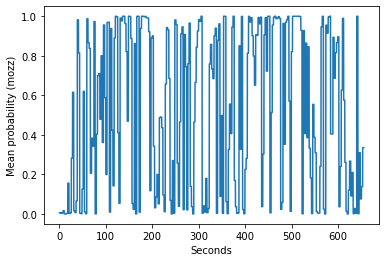

In [7]:
# Latest version from detector_testing_full

# raw = [r'D:\Postdoc\Data\Semi Field Data\UK bednet trial\PHONE A\2020-09-08_19.04.55.928__v0.wav']
# filtered = [r'D:\Postdoc\MozzDetectorTestingSQL\Code\notebooks\proc_data\VADout\2020-09-08_19.04.55.928__v0.wav']
# TzA = [r'D:\Postdoc\MozzDetectorTestingSQL\Code\notebooks\proc_data\VADout\TanzaniaBednetOctober\01-10-2020\B2\2020-10-01_18.44.21.802__v3.wav']
# TzAraw = [r'D:\Postdoc\Data\Semi Field Data\TanzaniaBednetOctober\01-10-2020\B2\2020-10-01_18.44.21.802__v3.wav']
# # Confirmed noise (Dav):
dav_noise = [r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise0.wav',
             r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise1.wav',
             r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise2.wav', 
             r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise3.wav',
             r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise4.wav',
             r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise5.wav', 
             r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise6.wav']




sr = 8000

# Tanzania
# directory = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/VADout/Semi Field Data/TanzaniaBednetOctober/02-10-2020/'
# subdirectories = ['A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'B4', 'C1', 'C2', 'C3', 'C4']

directory = 'D:/Postdoc/Data/Semi Field Data/TanzaniaBednetOctober/2020-10-15 - 2020-10-16/'
# directory = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/VADout/Semi Field Data/TanzaniaBednetOctober/2020-10-15 - 2020-10-16/'
subdirectories = ['A1', 'B1']
dir_out = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/Semi Field Data/TanzaniaBednetOctober/2020-10-15 - 2020-10-16/'

# # # subdirectories = ['A1']
directory = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/Culex_for_ogg/'
dir_out = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/Culex_for_ogg/'

subdirectories = ['']


# # UK bednet
# directory = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/VADout/Semi Field Data/UK bednet trial/'
# subdirectories = ['PHONE A','PHONE B']
# dir_out = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/Classifierout/VADout/Semi Field Data/UK bednet trial/'


# Thai
# directory = 'D:/Postdoc/MozzDetectorTestingSQL/Data/Thai/'
# subdirectories = ['sounds']
# dir_out = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/Classifierout/Thai/'

# directory  = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/music/'
# subdirectories = ['']
# dir_out = directory
# directory = 'F:\Music\Guitar Playthroughs\Audacity'



# directory = 'D:/Postdoc/Data/OneDrive_2020-11-30/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/C1/2020-11-10/'
# subdirectories = ['0000', '0100', '0200', '0300', '0400', '0500']
# dir_out = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/IFAKARA - NOVEMBER 2020 BEDNET PHONE DOWNLOADS/9to10-11-20/C1/'

#CNN:
to_filter = False
norm = False
step_size= 40
BNN = True
n_samples = 100

if norm:
    mean= np.load('mean_norm.npy')
    std = np.load('std_norm.npy')
else:
    mean = 0
    std = 1

for subdir in subdirectories:
    listdirectory = os.listdir(directory + subdir) # gets the name of all files in your dir
    for filename in listdirectory: 
        if filename.endswith(".wav"): # check each of the files for whether or not they end in .wav:
            print(filename)
            x, x_l = util.get_wav_for_path_pipeline([directory + subdir + '/' + filename], sr =8000)
#             print(np.shape(x))
#             X = util.get_feat(x, sr=8000, feat_type=feat_type, flatten = flatten, n_feat=n_feat)
            X_CNN = util.get_feat(x, sr=8000, feat_type=feat_type, n_feat=n_feat, flatten = False)
    
            X_CNN = util.reshape_feat(X_CNN, win_size=win_size, step_size=step_size)
#             X_CNN = (X_CNN - mean)/std
#             print(np.shape(X_CNN))
            
            if BNN:
                out = []
                for i in range(n_samples):
                    out.append(model.predict(X_CNN))
                
                G_X, U_X, _ = util.active_BALD(np.log(out), X_CNN, 2)
                preds_list = util.detect_timestamps_BNN(np.repeat(np.mean(out, axis=0), step_size, axis=0),
                                      np.repeat(G_X, step_size, axis=0),
                                      np.repeat(U_X, step_size, axis=0))   
            
            if to_filter:
                preds_filt = np.zeros([len(preds_CNN),2])
                preds_filt[:,1] = medfilt(preds_CNN[:,1], kernel_size=51)
                preds_filt[:,0] = 1 - preds_filt[:,1]
                preds_CNN = preds_filt
            
#             preds_list = util.detect_timestamps_BNN(np.repeat(preds_CNN, step_size, axis=0))
            print(preds_list)
            plt.plot((1/sr)*librosa.frames_to_samples(np.arange(len(np.repeat(np.mean(out, axis=0),step_size, axis=0))), hop_length=512),
                                               np.repeat(np.mean(out, axis=0), step_size, axis=0)[:,1])
            plt.xlabel('Seconds')
            plt.ylabel('Mean probability (mozz)')
            plt.show()

                    
            if not os.path.exists(dir_out + subdir): os.makedirs(dir_out + subdir)
            np.savetxt(dir_out + subdir + '/' + 'BNN_step_40_samples_100' + str(model_name) + filename + '.txt', preds_list, fmt='%s', delimiter='\t')
                               

# View predictions for certain features

In [75]:
X_Culex = np.load('proc_data/X_Culex_log-mel-step5.npy')
X_Culex_rest = np.load('proc_data/X_Culex_no_00_log-mel-step5.npy')

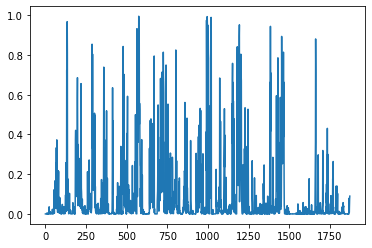

In [76]:
plt.plot(model.predict(X_Culex)[:,1])

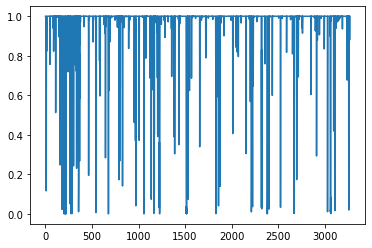

In [77]:
plt.plot(model.predict(X_Culex_rest)[:,1])